In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

In [63]:
from random import randint
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os

In [2]:
train_labels=[]
train_samples=[]

In [4]:
for i in range(50):
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
#it is important to shuffle data
train_labels, train_samples = shuffle(train_labels, train_samples)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [13]:
scaled_train_samples

array([[0.85057471],
       [0.89655172],
       [0.90804598],
       ...,
       [0.05747126],
       [0.72413793],
       [0.63218391]])

In [15]:
## create model
model = Sequential([
    Dense(units=16 , input_shape=(1,), activation='relu'),
    Dense(units=32 , activation='relu'),
    Dense(units=2 , activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [17]:
##compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
##training model
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    validation_split=0.1,
    batch_size=100,
    shuffle=True,
    epochs=30,
    verbose=2
)

Epoch 1/30
19/19 - 0s - loss: 0.2401 - accuracy: 0.9423 - val_loss: 0.2788 - val_accuracy: 0.9333
Epoch 2/30
19/19 - 0s - loss: 0.2400 - accuracy: 0.9423 - val_loss: 0.2788 - val_accuracy: 0.9333
Epoch 3/30
19/19 - 0s - loss: 0.2400 - accuracy: 0.9423 - val_loss: 0.2788 - val_accuracy: 0.9333
Epoch 4/30
19/19 - 0s - loss: 0.2400 - accuracy: 0.9423 - val_loss: 0.2788 - val_accuracy: 0.9333
Epoch 5/30
19/19 - 0s - loss: 0.2399 - accuracy: 0.9423 - val_loss: 0.2788 - val_accuracy: 0.9333
Epoch 6/30
19/19 - 0s - loss: 0.2399 - accuracy: 0.9423 - val_loss: 0.2788 - val_accuracy: 0.9333
Epoch 7/30
19/19 - 0s - loss: 0.2399 - accuracy: 0.9423 - val_loss: 0.2788 - val_accuracy: 0.9333
Epoch 8/30
19/19 - 0s - loss: 0.2397 - accuracy: 0.9423 - val_loss: 0.2787 - val_accuracy: 0.9333
Epoch 9/30
19/19 - 0s - loss: 0.2397 - accuracy: 0.9423 - val_loss: 0.2787 - val_accuracy: 0.9333
Epoch 10/30
19/19 - 0s - loss: 0.2397 - accuracy: 0.9423 - val_loss: 0.2787 - val_accuracy: 0.9333
Epoch 11/30
19/19 -

In [23]:
test_labels=[]
test_samples=[]

In [24]:
for i in range(50):
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [25]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
#it is important to shuffle data
test_labels, test_samples = shuffle(test_labels, test_samples)

In [26]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [27]:
prediction = model.predict(x=scaled_test_samples, batch_size=10)

In [28]:
for i in prediction:
    print(i)

[0.01687213 0.98312783]
[0.266019  0.7339811]
[0.02363789 0.97636205]
[0.06896637 0.9310336 ]
[0.19159316 0.80840683]
[0.19159316 0.80840683]
[0.97511566 0.02488432]
[0.6646729  0.33532706]
[0.06896637 0.9310336 ]
[0.9640343  0.03596568]
[0.6158098  0.38419023]
[0.97541296 0.024587  ]
[0.35660276 0.6433972 ]
[0.97578216 0.02421789]
[0.02570675 0.97429323]
[0.08749548 0.9125045 ]
[0.6158098  0.38419023]
[0.02570675 0.97429323]
[0.04988936 0.9501107 ]
[0.11914925 0.8808508 ]
[0.6158098  0.38419023]
[0.05870549 0.94129455]
[0.02173183 0.9782681 ]
[0.0279515  0.97204846]
[0.02570675 0.97429323]
[0.11914925 0.8808508 ]
[0.78940654 0.21059345]
[0.9738931  0.02610688]
[0.11914925 0.8808508 ]
[0.05412845 0.9458715 ]
[0.6158098  0.38419023]
[0.01687213 0.98312783]
[0.05870549 0.94129455]
[0.97511566 0.02488432]
[0.01424331 0.9857567 ]
[0.04988936 0.9501107 ]
[0.266019  0.7339811]
[0.19159316 0.80840683]
[0.939526   0.06047396]
[0.9755603  0.02443964]
[0.02363789 0.97636205]
[0.95839596 0.041603

[0.3094852 0.6905148]
[0.9738931  0.02610688]
[0.9614881  0.03851187]
[0.9712289  0.02877114]
[0.9755603  0.02443964]
[0.19159316 0.80840683]
[0.08086672 0.9191333 ]
[0.12847745 0.8715225 ]
[0.1384213  0.86157876]
[0.19159316 0.80840683]
[0.9755603  0.02443964]
[0.85146385 0.1485362 ]
[0.01997632 0.9800237 ]
[0.05412845 0.9458715 ]
[0.09461176 0.9053883 ]
[0.03302564 0.9669744 ]
[0.6646729  0.33532706]
[0.10224195 0.897758  ]
[0.40666938 0.5933306 ]
[0.95839596 0.04160399]
[0.11041243 0.8895876 ]
[0.9312253  0.06877471]
[0.08749548 0.9125045 ]
[0.04596614 0.95403385]
[0.9092725 0.0907275]
[0.01424331 0.9857567 ]
[0.02363789 0.97636205]
[0.01835996 0.98164004]
[0.266019  0.7339811]
[0.89595604 0.10404391]
[0.939526   0.06047396]
[0.97582155 0.0241784 ]
[0.96620107 0.03379893]
[0.97570294 0.02429704]
[0.9705226  0.02947739]
[0.9745105  0.02548951]
[0.03588593 0.96411407]
[0.06896637 0.9310336 ]
[0.89595604 0.10404391]
[0.97481483 0.02518515]
[0.9752647  0.02473523]
[0.9512889  0.04871114

In [31]:
rounded_prediction = np.argmax(prediction,axis=-1)

In [32]:
for i in rounded_prediction:
    print(i)

1
1
1
1
1
1
0
0
1
0
0
0
1
0
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
0
0
1
0
0
1
1
0
1
1
0
0
0
1
1
0
1
1
1
1
1
1
1
1
1
0
0
1
0
1
1
1
1
0
0
0
0
1
0
1
0
1
1
1
1
1
1
1
1
0
0
0
1
0
0
0
1
0
1
1
1
0
1
0
1
1
1
0
1
1
1
0
1
0
0
0
0
0
1
0
1
0
1
0
0
1
1
0
1
0
0
0
1
0
1
1
1
1
0
1
0
1
0
1
1
0
0
1
1
1
0
1
1
0
0
1
1
1
0
0
0
1
1
0
1
0
1
0
0
1
0
0
0
1
1
0
0
0
1
0
1
0
1
0
0
1
1
0
0
0
1
1
0
1
0
0
1
1
1
0
0
1
1
0
0
0
0
1
1
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
1
0
1
1
0
1
0
0
1
0
0
0
0
1
1
0
1
0
1
1
1
1
0
0
0
1
1
1
1
1
1
0
1
1
1
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
1
1
1
0
0
0
1
1
1
0
0
1
0
1
0
1
1
0
1
1
0
1
1
0
0
1
0
1
0
1
1
0
0
1
0
1
0
1
1
0
1
0
0
0
1
0
1
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
1
0
1
0
0
1
1
1
1
0
0
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
0
1
1
1
0
0
0
1
0
0
0
1
0
1
0
1
1
0
0
0
0
1
1
1
0
0
0
1
0
0
1
1
1
1
0
0
0
1
1
1
1
1
1
0
1
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
0
1
0
1
1
1
1
1
1
1
0
0
1
0
1
0
1
1
0
1
0
0
1
0
1
1
1
0
1
0
0
1
1


In [66]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title='confusion_matrix',
    cmap=plt.cm.Blues
):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalize confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color='white' if cm[i,j]> thresh else 'black'
                )
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[ 980   70]
 [  50 1000]]


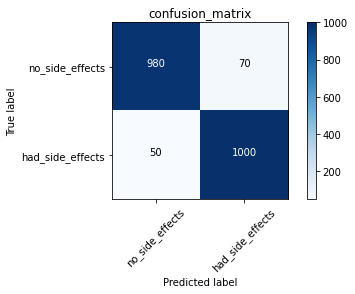

In [67]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_prediction)
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)


In [39]:
## save and load model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [41]:
if os.path.isfile('./model/medical_trial_model.h5') is False:
    model.save('./model/medical_trial_model.h5')


In [43]:
new_model = load_model('./model/medical_trial_model.h5')

In [44]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [49]:
new_model.get_weights()

[array([[-0.45584366, -0.21934825,  0.2315468 ,  0.34395364, -0.17008519,
         -0.38954526,  0.6113478 ,  0.47262102,  0.39920393,  0.3078964 ,
          0.39605516, -0.39930537, -0.477897  ,  0.57269317,  0.7188652 ,
         -0.05908263]], dtype=float32),
 array([ 0.        ,  0.        , -0.10724943, -0.15946051,  0.21543197,
         0.        , -0.07105746, -0.1596674 ,  0.1779984 , -0.1423659 ,
        -0.15488419,  0.        ,  0.        , -0.17798713, -0.15717487,
         0.        ], dtype=float32),
 array([[-6.29088879e-02, -1.70813084e-01,  3.43380898e-01,
          2.82206267e-01,  9.38821733e-02,  2.49406397e-02,
         -1.32747144e-01, -5.25388420e-02,  1.89995795e-01,
          3.13447028e-01,  2.23413706e-02, -5.80060184e-02,
         -2.45702207e-01, -2.29286939e-01, -3.18019986e-02,
         -7.11255968e-02, -3.01316381e-03, -3.15736443e-01,
         -4.07493114e-03,  3.20310086e-01,  1.67294055e-01,
          6.32876158e-02, -3.07372063e-01,  7.18351603e-02,
 

In [50]:
new_model.optimizer

In [51]:
## save to json
json_string = model.to_json()

In [52]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [54]:
model_architecture = model_from_json(json_string)

In [57]:
model_architecture.get_weights()

[array([[ 0.45440745,  0.33649194, -0.36315173, -0.1737406 , -0.4108557 ,
          0.29363298, -0.5753039 , -0.16803059,  0.24693537,  0.01362365,
         -0.22776318, -0.12390637,  0.01236731, -0.10885793,  0.10611928,
         -0.04975748]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 2.50395507e-01, -2.30661035e-03,  1.83789521e-01,
         -2.93950588e-01, -3.36131066e-01,  1.69420242e-02,
          4.00224924e-02, -2.65187293e-01,  8.39695930e-02,
          2.59314984e-01, -2.56069928e-01, -7.64358044e-03,
         -3.51215422e-01, -1.76755875e-01, -2.86749274e-01,
          2.50695378e-01, -6.99259341e-02,  3.51152927e-01,
          3.48952740e-01, -3.15697014e-01,  3.06824774e-01,
          2.02128381e-01,  1.31289870e-01, -2.23387733e-01,
          1.59852356e-01, -2.07140043e-01,  1.68138117e-01,
         -2.60760009e-01, -1.64152443e-01,  2.49291331e-01,
          1.40466332e-01,  1.42742276e-01]

In [58]:
## save model weight

In [59]:
if os.path.isfile('./model/my_model_weights.h5') is False:
    model.save_weights('./model/my_model_weights.h5')


In [60]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [61]:
model2.load_weights('./model/my_model_weights.h5')

In [62]:
model2.get_weights()

[array([[-0.45584366, -0.21934825,  0.2315468 ,  0.34395364, -0.17008519,
         -0.38954526,  0.6113478 ,  0.47262102,  0.39920393,  0.3078964 ,
          0.39605516, -0.39930537, -0.477897  ,  0.57269317,  0.7188652 ,
         -0.05908263]], dtype=float32),
 array([ 0.        ,  0.        , -0.10724943, -0.15946051,  0.21543197,
         0.        , -0.07105746, -0.1596674 ,  0.1779984 , -0.1423659 ,
        -0.15488419,  0.        ,  0.        , -0.17798713, -0.15717487,
         0.        ], dtype=float32),
 array([[-6.29088879e-02, -1.70813084e-01,  3.43380898e-01,
          2.82206267e-01,  9.38821733e-02,  2.49406397e-02,
         -1.32747144e-01, -5.25388420e-02,  1.89995795e-01,
          3.13447028e-01,  2.23413706e-02, -5.80060184e-02,
         -2.45702207e-01, -2.29286939e-01, -3.18019986e-02,
         -7.11255968e-02, -3.01316381e-03, -3.15736443e-01,
         -4.07493114e-03,  3.20310086e-01,  1.67294055e-01,
          6.32876158e-02, -3.07372063e-01,  7.18351603e-02,
 